# Direct Methods

Zero-order method used to find local minima. Useful for when there isn't a derivative information for some function.

## Cyclic Coordinate Search

First idea is to search along coordinate directions (similar to line search) starting from an initial $x^k$. Using a basis function to perform a line search along.

## Powell's Method

Next idea is to search in directions that are not orthogonal to one another (helpful for long and/or narrow valleys of descent). Algorihm is similar to cyclic except change in direction to form new line search on each iteration. Key insight is that it will drop oldest search direction and utilize an overall direction of progress from the first point. Algorithm recommends to reset the direction for every $N$ steps.

## Hooke-Jeeves

Traverse the seach space based on small steps in each coordinate direction defined by $\alpha$ and evaluate $f(x)$ and $f(x +- \alpha * e^i)$. It then accepts improvements given the current $\alpha$ or otherwise will decrease $\alpha$ and resume search to convergence criteria is met.

## Generalized Pattern Search

Generalizes Hooke-Jeeves to search in arbitrary directions according to a pattern $P$ defined by directions $D$ about an anchor point $X$ according to a step size $\alpha$.

$P = {x + \alpha * d for each d in D}$

smaller time cost than hooke-jeeves 2n > n + 1

## Nelder Mead Simplex Method

One of the most popular direct methods of optimization which uses a simplex to traverse the space in search of a minimum (e.g., uses a tetrahedron to n-dim space... 1d = line, 2d = triangle, etc.). Similar to Hooke-Jeeves the simplex can adjust in size and move around the space to find the local minimum. The simplex consist of points $x^1 to x^{n+1} where x_h is the highest vertex, x_s is the second highest, and x_l is the lowest$. The algorithm will be shown below but the method contains four crucial elements:

1. Reflection: Reflect highest point over the centroid $x_r = x + \alpha * (x - x_h)$
1. Expansion: Expand reflected point further from the centroid $x_e = x + \beta * (x_r - x)$
1. Contraction: Shrink simplex moving away from worst point $x_c = x + \gamma * (x_h - x)$
1. Shrinkage: Move all points towards best point by halving the separation distance

In [1]:
using Plots
using LinearAlgebra
using Statistics
using OptiMize: plot_min_of_f

function nelder_mead(f, S, ϵ, px=[]; α=1.0, β=2.0, γ=0.5)
    Δ, y_arr = Inf, f.(S)
    anim = @animate while Δ > ϵ
        # sort function evaluation from smallest to largest along direction
        p = sortperm(y_arr)

        # create assignments for the simplex
        S, y_arr = S[p], y_arr[p]
        xl, yl = S[1], y_arr[1]
        xh, yh = S[end], y_arr[end]
        xs, ys = S[end-1], y_arr[end-1]
        xm = mean(S[1:end-1, :])

        # compute reflection point
        xr = xm + α * (xm - xh)
        yr = f(xr)

        # first case: compare reflection point to lowest point
        if yr < yl
            # compute expansion point
            xe = xm + β * (xr - xm)
            ye = f(xe)

            # set simplex xh based on expansion point or reflection point (whichever is lower)
            S[end], y_arr[end] = ye < yr ? (xe, ye) : (xr, yr)
        
        # second case: compare reflection point to second highest point
        elseif yr >= ys
            # check if reflection point is lower than highest point
            if yr < yh
                # set simplex xh based on reflection point
                xh, yh, S[end], y_arr[end] = xr, yr, xr, yr
            end
            # compute contraction point
            xc = xm + γ * (xh - xm)
            yc = f(xc)

            # check if contraction point is lower than highest point
            if yc > yh
                # shrink simplex in half towards lowest point
                for i in 2 : length(y_arr)
                    S[i] = (S[i] + xl) / 2
                    y_arr[i] = f(S[i])
                end
            else
                # set the simplex xh to the contraction point
                S[end], y_arr[end] = xc, yc
            end

        else
            # set the simplex xh to the reflection point
            S[end], y_arr[end] = xr, yr
        end

        pts = cat(S, y_arr, dims=2)
        plot_min_of_f(f, px, pts)

        Δ = std(y_arr, corrected=false)
    end
    # return best point = lowest point
    return S[argmin(y_arr)], anim
end

nelder_mead (generic function with 2 methods)

x = [-0.0005567023508396584, 0.0009631864268001087]


┌ Info: Saved animation to /tmp/jl_ITofQjaruT.gif
└ @ Plots /home/dakre/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_ITofQjaruT.gif")
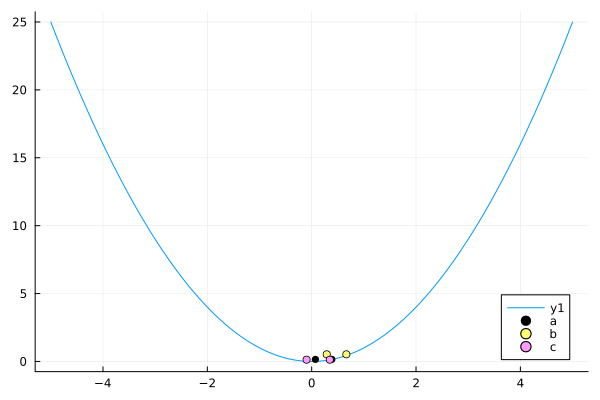

In [2]:
f(x) = sum(x.^2)
S = [rand(2) for i in 1:3]
ϵ = 1e-6

px = range(-5, 5, length=100)
x, anim = nelder_mead(f, S, ϵ, px)

println("x = $x")

gif(anim, fps=5)